# Task 2 - sub task 1
[link to the task](https://project.las.ethz.ch/task2/)       
What have we tried?
- How to manage data 
    - data imputation
        - Replace nan with a random wrong number
        - Replace nan with the mean value for that column; and add other columns that indicate if that value was present or not (with 1 if it was present and 0 if it was nan). Because if the value is the mean value, it doesn't say anything, but it is important to know if the measure was taken or not

    - Imbalanced data
        - train on the same number of 0s and 1s
    - Normalized values

- Types of models used:
    - SVM sklearn svm.SVC 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
import datetime


In [2]:
## Read training data, labels, test data
train_data = pd.read_csv('dataset/train_features.csv', delimiter=',')
train_labels = pd.read_csv('dataset/train_labels.csv', delimiter=',')
test_data = pd.read_csv('dataset/test_features.csv', delimiter=',')

In [3]:
# sort train data and labels values by pid, so they are the same (because after with the manipulation of data things get nasty)
train_data =train_data.sort_values(['pid','Time'])
train_labels = train_labels.sort_values(['pid'])

In [4]:
# labels needed for this subtask only up to LABEL_EtCO2
train_labels_1 = train_labels.iloc[:,:11]
# set pid as index for labels (after it will be also for training data because we use the pivot function)
train_labels_1=train_labels_1.set_index('pid')


***

## How to replace Nan
### DO NOT USE Replace with number -9999 (not updated with normalisation and solving the unbalance)

In [4]:
# replace nan in training data with -9999
train_data_1 = train_data.iloc[:,:]
train_data_1 = train_data_1.replace(np.nan,-9999)

In [5]:
test_data_1 = test_data.iloc[:,:]
test_data_1 = test_data_1.replace(np.nan,-9999)

In [6]:
# Time Stamp between 1 and 12 (I simply replace it with numbers from 1 to 12)
# To check :
    # Are time stamps for a single patient consecutive?
    # Are the times for each patient in order?
    
train_data_1['Time']= np.array([[1,2,3,4,5,6,7,8,9,10,11,12] for i in range(int(len(train_data_1['Time'])/12))]).flatten()

test_data_1['Time']= np.array([[1,2,3,4,5,6,7,8,9,10,11,12] for i in range(int(len(test_data_1['Time'])/12))]).flatten()

In [7]:
# now we flatten the dataframe for each patient using the pivot function on the column Time
columns = train_data_1.columns
print(columns[2:])

train_data_1 = train_data_1.pivot(index='pid', columns='Time', values=columns[2:])
test_data_1 = test_data_1.pivot(index='pid', columns='Time', values=columns[2:])

Index(['Age', 'EtCO2', 'PTT', 'BUN', 'Lactate', 'Temp', 'Hgb', 'HCO3',
       'BaseExcess', 'RRate', 'Fibrinogen', 'Phosphate', 'WBC', 'Creatinine',
       'PaCO2', 'AST', 'FiO2', 'Platelets', 'SaO2', 'Glucose', 'ABPm',
       'Magnesium', 'Potassium', 'ABPd', 'Calcium', 'Alkalinephos', 'SpO2',
       'Bilirubin_direct', 'Chloride', 'Hct', 'Heartrate', 'Bilirubin_total',
       'TroponinI', 'ABPs', 'pH'],
      dtype='object')


In [8]:
# split train data into train and validation
X_train, X_test, y_train, y_test = train_test_split(train_data_1,train_labels_1, train_size=0.8)

In [12]:
train_data_1

Age                                                        ...  \
Time     1     2     3     4     5     6     7     8     9     10  ...   
pid                                                                ...   
1      34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  ...   
2      86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  ...   
4      66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  ...   
6      66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  ...   
8      42.0  42.0  42.0  42.0  42.0  42.0  42.0  42.0  42.0  42.0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
31653  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  ...   
31654  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  66.0  ...   
31656  44.0  44.0  44.0  44.0  44.0  44.0  44.0  44.0  44.0  44.0  ...   
31657  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  ...   
31658  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  ...   

            pH                                                                 \
Time        3        4        5        6        7        8        9        10   
pid                                                                             
1         7.37     7.37     7.41 -9999.00 -9999.00 -9999.00 -9999.00     7.39   
2     -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
4     -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
6     -9999.00     7.33     7.35     7.34     7.39     7.37     7.34 -9999.00   
8     -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
...        ...      ...      ...      ...      ...      ...      ...      ...   
31653 -9999.00     7.33     7.33 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
31654 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
31656 -9999.00     7.28 -9999.00     7.34 -9999.00     7.33 -9999.00 -9999.00   
31657 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   
31658 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00   

                        
Time        11      12  
pid                     
1         7.39 -9999.0  
2     -9999.00 -9999.0  
4     -9999.00 -9999.0  
6     -9999.00 -9999.0  
8     -9999.00 -9999.0  
...        ...     ...  
31653 -9999.00 -9999.0  
31654 -9999.00 -9999.0  
31656 -9999.00 -9999.0  
31657 -9999.00 -9999.0  
31658 -9999.00 -9999.0  

[18995 rows x 420 columns]

In [13]:
test_data_1

Age                                                        ...  \
Time     1     2     3     4     5     6     7     8     9     10  ...   
pid                                                                ...   
0      39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  ...   
3      84.0  84.0  84.0  84.0  84.0  84.0  84.0  84.0  84.0  84.0  ...   
5      62.0  62.0  62.0  62.0  62.0  62.0  62.0  62.0  62.0  62.0  ...   
7      71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  ...   
9      51.0  51.0  51.0  51.0  51.0  51.0  51.0  51.0  51.0  51.0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
31647  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  ...   
31649  83.0  83.0  83.0  83.0  83.0  83.0  83.0  83.0  83.0  83.0  ...   
31651  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  ...   
31652  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  ...   
31655  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  ...   

            pH                                                            \
Time        3       4       5       6        7       8        9       10   
pid                                                                        
0         7.34 -9999.0 -9999.0 -9999.0 -9999.00     7.4 -9999.00 -9999.0   
3     -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
5     -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
7     -9999.00 -9999.0     7.4 -9999.0     7.36 -9999.0 -9999.00 -9999.0   
9     -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
...        ...     ...     ...     ...      ...     ...      ...     ...   
31647 -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
31649     7.26 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
31651 -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0     7.33 -9999.0   
31652 -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   
31655 -9999.00 -9999.0 -9999.0 -9999.0 -9999.00 -9999.0 -9999.00 -9999.0   

                        
Time        11      12  
pid                     
0     -9999.00 -9999.0  
3     -9999.00 -9999.0  
5     -9999.00 -9999.0  
7     -9999.00 -9999.0  
9     -9999.00 -9999.0  
...        ...     ...  
31647 -9999.00 -9999.0  
31649 -9999.00     7.3  
31651     7.38 -9999.0  
31652 -9999.00 -9999.0  
31655 -9999.00 -9999.0  

[12664 rows x 420 columns]

## How to replace Nan 2
### Replace with the mean and add columns with 1 and 0 to add the information about having or not having the value

In [5]:
# First part -> replace nan with the mean of the column
train_data_2_tmp1 = train_data.copy()
for col in train_data_2_tmp1.columns:
    #print(col)
    mean = train_data_2_tmp1[col].mean()
    train_data_2_tmp1[col] = train_data_2_tmp1[col].replace(np.nan,train_data_2_tmp1[col].mean())
#train_data_2_tmp1

In [6]:
# normalise the values for each column
for col in train_data_2_tmp1.columns[2:]:
    #print(col)
    train_data_2_tmp1[col] = (train_data_2_tmp1[col] - train_data_2_tmp1[col].min()) / (train_data_2_tmp1[col].max() - train_data_2_tmp1[col].min())

In [7]:
# Second part -> add columns with 0 and 1s to indicate if the measurement was taken or not

# change the name of the columns to be able to use the pivot function later
train_data_2_tmp2 = pd.DataFrame()
for col in train_data.columns[2:]:
    train_data_2_tmp2[col+'_2'] = train_data[col].copy() 

# substitute integers with 1
train_data_2_tmp2=train_data_2_tmp2.mask(train_data_2_tmp2>-9999,1)
# substitute nan with 0
train_data_2_tmp2=train_data_2_tmp2.replace(np.nan,0)

In [8]:
train_data_2_tmp2

,Age_2,EtCO2_2,PTT_2,BUN_2,Lactate_2,Temp_2,Hgb_2,HCO3_2,BaseExcess_2,RRate_2,...,Alkalinephos_2,SpO2_2,Bilirubin_direct_2,Chloride_2,Hct_2,Heartrate_2,Bilirubin_total_2,TroponinI_2,ABPs_2,pH_2
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172879,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
172880,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
# concatenate part 1 and part2 for the complete set of training data
train_data_2 = pd.concat([train_data_2_tmp1, train_data_2_tmp2], axis=1)

In [10]:
train_data_2

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos_2,SpO2_2,Bilirubin_direct_2,Chloride_2,Hct_2,Heartrate_2,Bilirubin_total_2,TroponinI_2,ABPs_2,pH_2
0,1,3,0.223529,0.254257,0.116174,0.041199,0.086354,0.714286,0.263415,0.480000,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1,4,0.223529,0.254257,0.116174,0.083119,0.086354,0.714286,0.357474,0.469762,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1,5,0.223529,0.254257,0.116174,0.083119,0.086354,0.714286,0.357474,0.469762,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1,6,0.223529,0.254257,0.116174,0.083119,0.086354,0.761905,0.357474,0.469762,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1,7,0.223529,0.254257,0.116174,0.083119,0.086354,0.754864,0.357474,0.469762,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172879,31658,8,0.529412,0.254257,0.116174,0.083119,0.086354,0.761905,0.357474,0.469762,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
172880,31658,9,0.529412,0.254257,0.116174,0.083119,0.086354,0.754864,0.357474,0.469762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172881,31658,10,0.529412,0.254257,0.116174,0.083119,0.086354,0.754864,0.357474,0.469762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172882,31658,11,0.529412,0.254257,0.116174,0.083119,0.086354,0.754864,0.357474,0.469762,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
# Time Stamp between 1 and 12 (I simply replace it with numbers from 1 to 12) because we need it to use the pivot function after
    
train_data_2['Time']= np.array([[1,2,3,4,5,6,7,8,9,10,11,12] for i in range(int(len(train_data_2['Time'])/12))]).flatten()

#test_data_2['Time']= np.array([[1,2,3,4,5,6,7,8,9,10,11,12] for i in range(int(len(test_data_2['Time'])/12))]).flatten()

In [11]:
# now we flatten the dataframe for each patient using the pivot function on the column Time
columns = train_data_2.columns
print(columns[2:])

train_data_2 = train_data_2.pivot(index='pid', columns='Time', values=columns[2:])
#test_data_1 = test_data_1.pivot(index='pid', columns='Time', values=columns[2:])

Index(['Age', 'EtCO2', 'PTT', 'BUN', 'Lactate', 'Temp', 'Hgb', 'HCO3',
       'BaseExcess', 'RRate', 'Fibrinogen', 'Phosphate', 'WBC', 'Creatinine',
       'PaCO2', 'AST', 'FiO2', 'Platelets', 'SaO2', 'Glucose', 'ABPm',
       'Magnesium', 'Potassium', 'ABPd', 'Calcium', 'Alkalinephos', 'SpO2',
       'Bilirubin_direct', 'Chloride', 'Hct', 'Heartrate', 'Bilirubin_total',
       'TroponinI', 'ABPs', 'pH', 'Age_2', 'EtCO2_2', 'PTT_2', 'BUN_2',
       'Lactate_2', 'Temp_2', 'Hgb_2', 'HCO3_2', 'BaseExcess_2', 'RRate_2',
       'Fibrinogen_2', 'Phosphate_2', 'WBC_2', 'Creatinine_2', 'PaCO2_2',
       'AST_2', 'FiO2_2', 'Platelets_2', 'SaO2_2', 'Glucose_2', 'ABPm_2',
       'Magnesium_2', 'Potassium_2', 'ABPd_2', 'Calcium_2', 'Alkalinephos_2',
       'SpO2_2', 'Bilirubin_direct_2', 'Chloride_2', 'Hct_2', 'Heartrate_2',
       'Bilirubin_total_2', 'TroponinI_2', 'ABPs_2', 'pH_2'],
      dtype='object')


***

## Model Studies
### SVM

In [12]:
train_labels_1.columns

Index(['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST',
       'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate',
       'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct',
       'LABEL_EtCO2'],
      dtype='object')

In [26]:
# Making the training sample balanced ( same number of 0s and 1s) We need to do it for each binary classification

col = 'LABEL_BaseExcess'
train_data_2_0 = train_data_2[train_labels_1[col] == 0.].copy()
train_data_2_1 = train_data_2[train_labels_1[col] == 1.].copy()

#find the min lenght
min_len = min(len(train_data_2_0),len(train_data_2_1))

# balanced training data sample
train_data_ok = pd.concat([train_data_2_0.sample(min_len),train_data_2_1.sample(min_len)])
#shuffle the sample
train_data_ok = shuffle(train_data_ok)

In [27]:
#choose the right labels using the index and .loc function
train_labels_ok = train_labels_1.loc[train_data_ok.index].copy()

In [28]:
# split train data into train and validation
X_train, X_test, y_train, y_test = train_test_split(train_data_ok,train_labels_ok, train_size=0.8)

In [29]:
# Try with only one binary classification problem for now, after we need to do all of them

# we need some more studies here, the confusion matrix looks good, but the ROC AUC is 0.3, we would like it to be ~1

#classifier = svm.SVC(kernel = 'sigmoid', probability = True)
classifier = svm.SVC(probability = True)

In [30]:
#fit to the training data
print(datetime.datetime.now())
classifier.fit(X_train,y_train[col])
print(datetime.datetime.now())

2021-04-15 17:41:16.539619
2021-04-15 17:43:09.628271


In [31]:
#predictions on the validation data
# To have the probability output, I need to use predict_proba and not predict.
# 0th column is the prob that it is zero, and 1st is the prob that it is 1.

y_pred = classifier.predict_proba(X_test)
y_pred = pd.DataFrame(data=y_pred, columns=['prob_0','prob_1'])
print("ROC AUC: %.2f" %(np.sqrt(metrics.roc_auc_score(y_test[col], y_pred['prob_1']))))

ROC AUC: 0.84


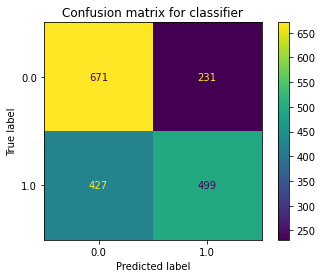

In [32]:
# confusion matrix
matrix = plot_confusion_matrix(classifier, X_test, y_test[col])
plt.title('Confusion matrix for classifier')
plt.show(matrix)
plt.show()

In [ ]:
#####################################################################

## LOOP over all the binary classification problems

LABEL_BaseExcess
5096
10192
10192
8153 2039
Column: LABEL_BaseExcess ROC AUC: 0.96


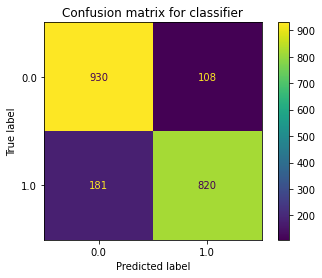

LABEL_Fibrinogen
1400
2800
2800
2240 560
Column: LABEL_Fibrinogen ROC AUC: 0.88


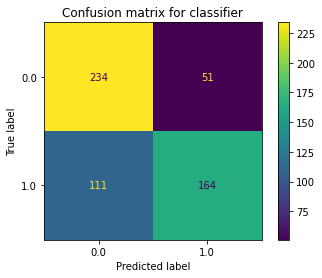

LABEL_AST
4554
9108
9108
7286 1822
Column: LABEL_AST ROC AUC: 0.83


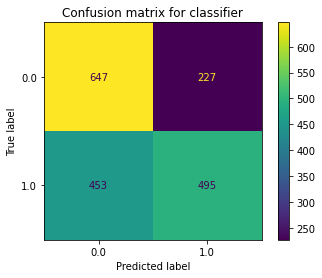

LABEL_Alkalinephos
4487
8974
8974
7179 1795
Column: LABEL_Alkalinephos ROC AUC: 0.85


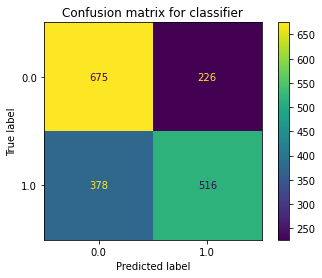

LABEL_Bilirubin_total
4570
9140
9140
7312 1828
Column: LABEL_Bilirubin_total ROC AUC: 0.84


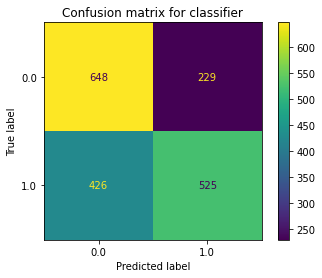

LABEL_Lactate
3803
7606
7606
6084 1522
Column: LABEL_Lactate ROC AUC: 0.88


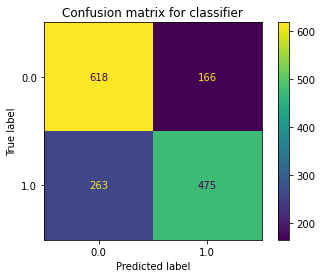

LABEL_TroponinI
1895
3790
3790
3032 758
Column: LABEL_TroponinI ROC AUC: 0.92


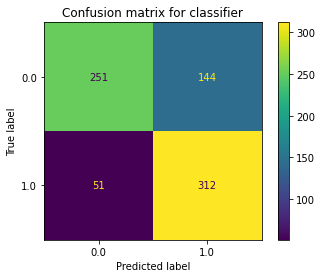

LABEL_SaO2
4439
8878
8878
7102 1776


KeyboardInterrupt: 

In [25]:
# Making the training sample balanced ( same number of 0s and 1s)
for col in train_labels_1:
    print(col)
    train_data_2_0 = train_data_2[train_labels_1[col] == 0.].copy()
    train_data_2_1 = train_data_2[train_labels_1[col] == 1.].copy()

    #find the min lenght
    min_len = min(len(train_data_2_0),len(train_data_2_1))
    print(min_len)
    
    
    # balanced training data sample
    train_data_ok = pd.concat([train_data_2_0.sample(min_len),train_data_2_1.sample(min_len)])
    print(len(train_data_ok))
    #shuffle the sample
    train_data_ok = shuffle(train_data_ok)
    
    #choose the right labels using the index and .loc function
    train_labels_ok = train_labels_1.loc[train_data_ok.index].copy()
    print(len(train_labels_ok))
    # split train data into train and validation
    X_train, X_test, y_train, y_test = train_test_split(train_data_ok,train_labels_ok, train_size=0.8)
    print(len(X_train),len(X_test))
    classifier = svm.SVC(probability = True)
    classifier.fit(X_train,y_train[col])
    y_pred = classifier.predict_proba(X_test)
    y_pred = pd.DataFrame(data=y_pred, columns=['prob_0','prob_1'])
    print("Column: "+col+" ROC AUC: %.2f" %(np.sqrt(metrics.roc_auc_score(y_test[col], y_pred['prob_1']))))
    # confusion matrix
    matrix = plot_confusion_matrix(classifier, X_test, y_test[col])
    plt.title('Confusion matrix for classifier')
    plt.show(matrix)
    plt.show()